Dans la première et deuxième partie de cet atelier, on va utiliser la base de données Advertising.Alors, l’objectif principal est de créer un modèle de régression pour prédire la variable Sales. 

La troisième partie traite le problème de classification en appliquant la régression logistique sur la base de données diabetescsv.csv. 

Pour cela, on commence à savoir comment :

- Récupérer des donn ́ees à partir d’un fichier csv et d ́ecouvrir ses principales caract ́eristiques.
- Visualiser les donn ́ees sous forme de graphe.

# Partie 1 : Régression linéaire simple

## 1. Récupérer des données à partir de fichier advertising.scv et découvrir ses principales caractéristiques.

In [336]:
import pandas as pd

In [337]:
data = pd.read_csv("advertising.csv")

In [338]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [339]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [340]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [341]:
#Checking null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [342]:
# test_data = test_data.dropna()

## 2. Initialiser X (predictors, variable indépendante) par la variable TV et y (cible, variable dépendante).

In [343]:
X = data['TV'].values
y = data['Sales'].values

In [344]:
X

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [345]:
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [346]:
X.max()

296.4

## 3. Pourquoi il s’agit d’un problème de régression

- apprentissatge supervisé : on a la colonne cible 
- c'est une prédiction 
- (R) parmis les hypothèses de RG, doit etre X est déterministe
- variable continue

## 4. Visualiser la base de données avec matplotlib.

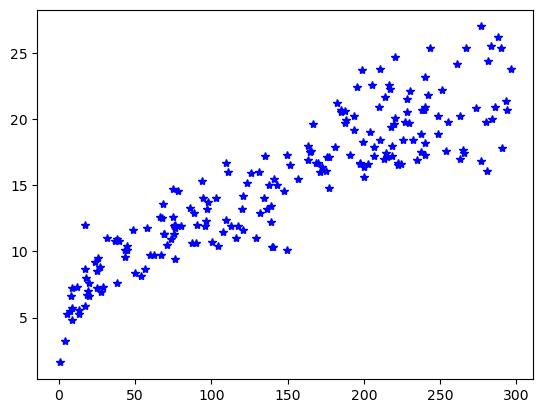

In [347]:
import matplotlib.pyplot as plt

plt.plot(X,y,"b*")
plt.show()

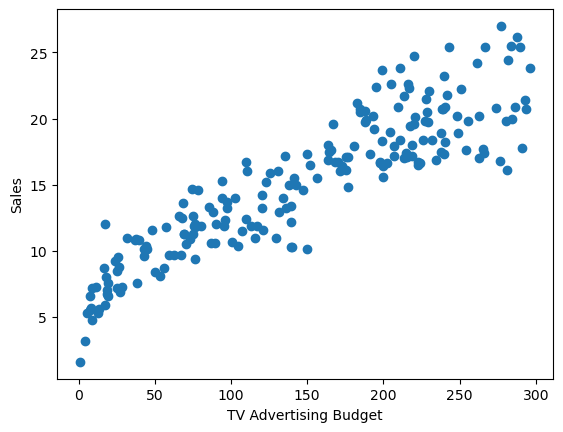

In [348]:
plt.scatter(X, y)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.show()

## 5. Soit le modèle de régression linéaire simple définit par
                                                                                   y = w0 + w1x

### (a) à l’aide de train test split de sklearn.model selection, diviser la base de données en base d’apprentissage et base de test

80% pour la base d’apprentissage et 20% pour la base de test

In [349]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### (b) Définir une fonction MSE(X,y,W) qui retourne la moyenne des erreurs entre la valeur théorique et la valeur réelle.

on utilise MSE pour le cas de dérivé en 0

In [350]:
def MSE(X,y,w0, w1):
    y_pred = w0 + w1 * X
    return np.mean((y - y_pred)**2, axis=0)

- The sum of elements, along with an axis divided by the number of elements, is known as arithmetic mean. 
- The numpy.mean() function is used to compute the arithmetic mean along the specified axis.
- This function returns the average of the array elements.

### (c) Définir la fonction Gradient(X,y,W)

In [351]:
import numpy as np

def Gradient(X, y, w0, w1):
    y_pred = w0 + w1 * X
    dW0 = -2 * np.mean(y - y_pred)
    dW1 = -2 * np.mean((y - y_pred) * X)
    return dW0, dW1

### (d) Etablir une fonction de mise à jour des paramètres W MiseJour(grad,W,alpha)

La fonction (d) "Etablir une fonction de mise à jour des paramètres W MiseJour(grad, W, alpha)" est un composant essentiel de l'algorithme de descente de gradient. Cette fonction est responsable de la mise à jour des paramètres du modèle (dans ce cas, les poids W) en fonction du gradient de la fonction de coût et d'un taux d'apprentissage (alpha). Voici une explication détaillée de cette fonction :

- `grad`: C'est un vecteur contenant les gradients des paramètres du modèle. Dans le contexte de la régression linéaire simple, il s'agit généralement d'un vecteur de deux éléments, où le premier élément représente la dérivée partielle de la fonction de coût par rapport à w0 (l'ordonnée à l'origine) et le deuxième élément représente la dérivée partielle par rapport à w1 (le coefficient de la variable prédictive).

- `W`: C'est un vecteur contenant les paramètres actuels du modèle. Dans le cas de la régression linéaire simple, W = [w0, w1].

- `alpha`: C'est le taux d'apprentissage, également appelé "pas d'apprentissage". Il détermine la taille des pas que l'algorithme de descente de gradient effectuera pour mettre à jour les paramètres. Le choix de cette valeur est important car un alpha trop petit peut entraîner une convergence lente, tandis qu'un alpha trop grand peut empêcher la convergence.

La fonction de mise à jour des paramètres W MiseJour(grad, W, alpha) est généralement implémentée de la manière suivante pour la régression linéaire simple :

- Mettez à jour w0 et w1 comme suit :
  - w0_new = w0 - alpha * grad[0]
  - w1_new = w1 - alpha * grad[1]

En d'autres termes, vous soustrayez le produit du taux d'apprentissage (alpha) et de la dérivée partielle de la fonction de coût par rapport à chaque paramètre (w0 et w1) des paramètres actuels pour obtenir les nouveaux paramètres. Cela permet à l'algorithme de se rapprocher des valeurs optimales des paramètres qui minimisent la fonction de coût.

La mise à jour des paramètres se fait itérativement à chaque étape de la descente de gradient, contribuant ainsi à la convergence de l'algorithme vers les paramètres optimaux qui donnent le meilleur ajustement du modèle aux données.

In [352]:
def MiseJour(grad, W, alpha):
    return [w - alpha * g for w, g in zip(W, grad)]

Le code `[w - alpha * g for w, g in zip(W, grad)]` est une expression de liste en Python qui met en œuvre la mise à jour des paramètres du modèle à l'aide du gradient et du taux d'apprentissage (alpha). Il effectue la mise à jour des paramètres en soustrayant le produit de `alpha` et du gradient (`g`) correspondant à chaque paramètre (`w`) dans le vecteur `W`. Voici comment cela fonctionne :

- `W` est le vecteur contenant les paramètres actuels du modèle. Dans le contexte de la régression linéaire simple, `W` est un vecteur avec deux éléments, représentant `w0` et `w1`.

- `grad` est le vecteur contenant les gradients correspondant à chaque paramètre dans `W`. Dans le contexte de la régression linéaire simple, `grad` est également un vecteur avec deux éléments, correspondant aux dérivées partielles de la fonction de coût par rapport à `w0` et `w1`.

- `alpha` est le taux d'apprentissage, qui détermine la taille des pas de mise à jour.

L'expression `[w - alpha * g for w, g in zip(W, grad)]` crée un nouveau vecteur de paramètres mis à jour en parcourant simultanément les éléments de `W` et de `grad`, en effectuant la mise à jour pour chaque paire de paramètres.

Voici une description détaillée de ce code :

- `w` et `g` sont les éléments correspondants de `W` et `grad` à chaque itération.

- `w - alpha * g` calcule la nouvelle valeur du paramètre en soustrayant le produit de `alpha` (le taux d'apprentissage) et `g` (le gradient) de la valeur actuelle de `w`.

- La compréhension de liste `[w - alpha * g for w, g in zip(W, grad)]` parcourt tous les éléments de `W` et `grad`, effectue ces mises à jour pour chaque élément et retourne un nouveau vecteur de paramètres mis à jour.

Cela permet d'ajuster itérativement les paramètres du modèle à mesure que vous descendez dans la direction du gradient, en cherchant à minimiser la fonction de coût.

### (e) Ecrire la fonction Batch Gradient Descent(X,y,W,N max,alpha,eps), qui retourne les meilleurs paramètres estimés et de plus affiche l’évolution de MSE après chaque itération

In [353]:
def Batch_Gradient_Descent(X, y, W, N_max, alpha, eps):
    errors = []
    for _ in range(N_max):
        grad = Gradient(X, y, W[0], W[1])
        print("grad: ", grad)
        W = MiseJour(grad, W, alpha)
#         print("W: ",W)
        error = MSE(X, y, W[0], W[1])
#         print("error: ",error)
        errors.append(error)
#         print("errors: ",errors)
        if error < eps:
            break
    return W, errors

In [354]:
# Initialisation des paramètres et appel de la descente de gradient
initial_w0, initial_w1 = 0, 0
alpha = 0.1
N_max = 100
eps = 0.0001

W, errors = Batch_Gradient_Descent(X_train, y_train, [initial_w0, initial_w1], N_max, alpha, eps)

grad:  (-30.661250000000003, -5385.64225)
grad:  (161565.60786371873, 31865411.96050173)
grad:  (-955956584.800108, -188538566971.1529)
grad:  (5656122830813.761, 1115529003600081.6)
grad:  (-3.346566788462675e+16, -6.600267403450073e+18)
grad:  (1.9800682560538286e+20, 3.905190242159149e+22)
grad:  (-1.1715499933091437e+24, -2.310589843599871e+26)
grad:  (6.931727644369361e+27, 1.3671102031626206e+30)
grad:  (-4.101305826480038e+31, -8.088801709088608e+33)
grad:  (2.4266258493266914e+35, 4.785913596255408e+37)
grad:  (-1.435765402960531e+39, -2.831688768570784e+41)
grad:  (8.495014972787806e+42, 1.675429595787881e+45)
grad:  (-5.026258415134187e+46, -9.913039743625252e+48)
grad:  (2.9738939527044305e+50, 5.865263285651968e+52)
grad:  (-1.7595683531316935e+54, -3.470309239115003e+56)
grad:  (1.0410864807492662e+58, 2.0532831398289523e+60)
grad:  (-6.15981219751894e+61, -1.2148691548252326e+64)
grad:  (3.6445854412973917e+65, 7.188034785444764e+67)
grad:  (-2.1563974051460608e+69, -4.25

C:\Users\ayoub\AppData\Local\Temp\ipykernel_13768\2432369924.py:3: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred)**2, axis=0)
C:\Users\ayoub\anaconda3\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\ayoub\AppData\Local\Temp\ipykernel_13768\1708837584.py:6: RuntimeWarning: overflow encountered in multiply
  dW1 = -2 * np.mean((y - y_pred) * X)
C:\Users\ayoub\AppData\Local\Temp\ipykernel_13768\1406304670.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  return [w - alpha * g for w, g in zip(W, grad)]


In [355]:
W

[nan, nan]

In [356]:
errors

[8579583096.280955,
 3.003499148846975e+17,
 1.051450525316459e+25,
 3.6808673896667184e+32,
 1.2885803386929734e+40,
 4.51100002659004e+47,
 1.5791891765581164e+55,
 5.528349458342716e+62,
 1.9353379688284252e+70,
 6.775138007849036e+77,
 2.3718077030849598e+85,
 8.303110244981005e+92,
 2.9067128692868995e+100,
 1.017568050428482e+108,
 3.562253252440605e+115,
 1.2470564724570755e+123,
 4.3656352743354395e+130,
 1.528300583771508e+138,
 5.350201122130814e+145,
 1.8729726567669363e+153,
 6.556812525207389e+160,
 2.2953773689855957e+168,
 8.035546610179447e+175,
 2.8130454798768897e+183,
 9.847774215921183e+190,
 3.447461397318263e+198,
 1.2068706923423145e+206,
 4.2249548295677496e+213,
 1.4790518508029887e+221,
 5.1777935282388745e+228,
 1.812617036144963e+236,
 6.3455224736249346e+243,
 2.2214099647278653e+251,
 7.776605081619528e+258,
 2.722396475919258e+266,
 9.530434546065585e+273,
 3.336368653143018e+281,
 1.1679798791830201e+289,
 4.088807742787243e+296,
 1.4313901339782567e+304

### (f) Tracer l'évolution de l'erreur MSE après chaque itération

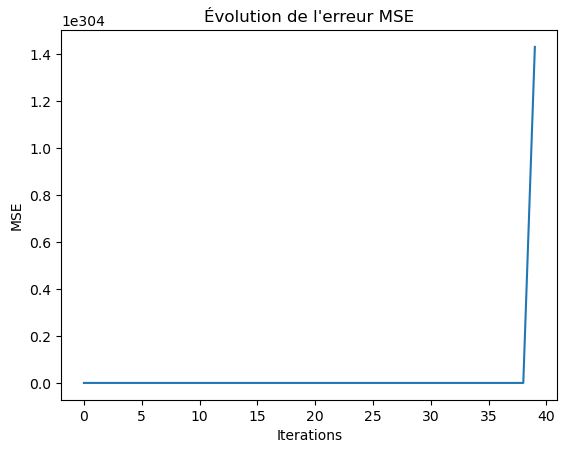

In [357]:
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Évolution de l\'erreur MSE')
plt.show()

### (g) Donner l’erreur de ce modèle

In [358]:
final_w0, final_w1 = W[0], W[1]
test_error = MSE(X_test, y_test, final_w0, final_w1)
print(f'Erreur sur l\'ensemble de test (MSE) : {test_error}')

Erreur sur l'ensemble de test (MSE) : nan
